## Going Around The Empty Board
In monopoly you get some money just from passing go (£200) and randomly from community chest and chance cards even if you do not own any properties. Simulate this by placing a dot on the scatter chart with the money you have after every complete turn. Keep repeating this and the scattering of dots should indicate the trend and the amount of random variability.

A trend line is also plotted on the chart. In order to bankrupt someone, you need to take money away from them faster than they can earn it. The steepness of the trend line indicates how quickly you need to take money away to stand a reasonable chance of bankrupting someone.

  1.260913 seconds (3.21 M allocations: 163.444 MiB, 4.68% gc time)


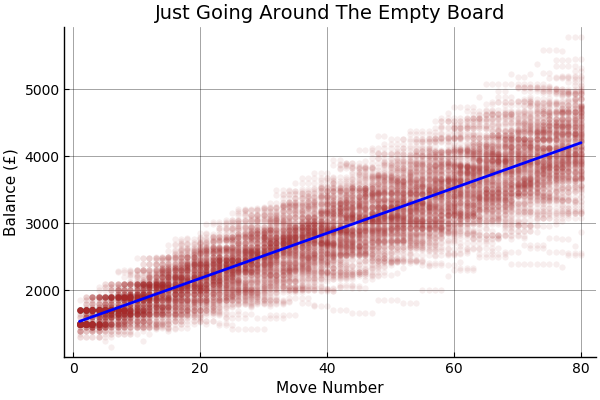

In [1]:
include("mp-datastructures.jl")
include("mp-functions.jl")
using Plots
pyplot()

"""    emptyboard(ngames, nmoves)
Player just loops around an empty board. Returns move number and money as n x 2 array.
Move numbers - out[:,1]
Money - out[:,2]"""
function emptyboard(ngames, nmoves)
    n = ngames * nmoves
    out = zeros(n,2)
    i = 0
    for game in 1:ngames
        mygame = newgame(1500)
        # random starting point
        currentplayer = mygame.players[mygame.currentplayer]
        currentplayer.location = rand(1:40)
        for move in 1:nmoves
            i += 1
            currentplayer = mygame.players[mygame.currentplayer]
            visited = taketurn!(mygame)
            out[i,:] = [move, currentplayer.money]
        end
    end
    return out
end

"""    linearfit(x, y)
Computes least squares fit straight line between scattered x and y points.
Returns pair of points as an x-array and y-array that can be used to directly plot a straight line"""
function linearfit(x, y)
    # sum_xx is sum of squares of x, sum_xy is sum of x*y
    sum_xx = sum(x -> x^2, x)
    sum_xy = sum(x .* y)
    n = length(x)
    # y = bx + a where b is slope and a is intercept
    slope = (n*sum_xy - sum(x)*sum(y)) /
            (n*sum_xx - sum(x)^2)
    intercept = (sum(y) - slope*sum(x)) / n
    xpoints = [minimum(x), maximum(x)]
    ypoints = slope .* xpoints .+ intercept
    return xpoints, ypoints
end

@time balances = emptyboard(200, 80)
x = balances[:,1]
y = balances[:,2]
xtrend, ytrend = linearfit(x, y)
plot(x, y
    ,seriestype=:scatter, seriesalpha=.08, seriescolor="brown"
    ,markerstrokewidth=0, markersize=4.5
    ,gridalpha=.5, legend=false
    ,title="Just Going Around The Empty Board"
    ,xlabel="Move Number", ylabel="Balance (£)"
    ,tickfontsize=10)
plot!(xtrend, ytrend, seriescolor="blue", linewidth=2)
